In [1]:
# a script to look at post-sorting steps of spike interface

#import the necessary packages
from pathlib import Path
import platform
import os
import shutil
import argparse
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface.sorters
import spikeinterface.full as si
import  scipy.signal
import spikeinterface.extractors as se
import spikeinterface.comparison
import spikeinterface.exporters
import spikeinterface.curation
import spikeinterface.widgets 
import docker
from datetime import datetime





In [2]:
#set up the base folder
base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23028'
date = '20230706'
# ephys folder
ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
print(ephys_folder)

/mnt/rds01/ibn-vision/DATA/SUBJECTS/M23028/ephys/20230706/


In [3]:
#load binary recording file
probe0_preprocessed_corrected = si.load_extractor(ephys_folder + 'probe0_preprocessed')
probe1_preprocessed_corrected = si.load_extractor(ephys_folder + 'probe1_preprocessed')

In [4]:
#compare sorters

#first load the sorting
probe0_sorting_ks2_5 = spikeinterface.sorters.read_sorter_folder(ephys_folder+'/probe0/sorters/kilosort2_5/', register_recording=True, sorting_info=True, raise_error=True)
probe0_sorting_ks3 = spikeinterface.sorters.read_sorter_folder(ephys_folder+'/probe0/sorters/kilosort3/', register_recording=True, sorting_info=True, raise_error=True)
probe1_sorting_ks2_5 = spikeinterface.sorters.read_sorter_folder(ephys_folder+'/probe1/sorters/kilosort2_5/', register_recording=True, sorting_info=True, raise_error=True)
probe1_sorting_ks3 = spikeinterface.sorters.read_sorter_folder(ephys_folder+'/probe1/sorters/kilosort3/', register_recording=True, sorting_info=True, raise_error=True)
print(probe0_sorting_ks2_5)
print(probe0_sorting_ks3)
print(probe1_sorting_ks2_5)
print(probe1_sorting_ks3)

KiloSortSortingExtractor: 500 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 587 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 728 units - 1 segments - 30.0kHz
KiloSortSortingExtractor: 419 units - 1 segments - 30.0kHz


In [5]:

# set up parallel processing jobs
job_kwargs = dict(n_jobs=20, chunk_duration='1s', progress_bar=True)
#remove duplicates
probe0_sorting_ks2_5 = si.remove_duplicated_spikes(sorting = probe0_sorting_ks2_5, censored_period_ms=0.3,method='keep_first')
probe0_sorting_ks3 = si.remove_duplicated_spikes(sorting = probe0_sorting_ks3, censored_period_ms=0.3,method='keep_first')
probe1_sorting_ks2_5 = si.remove_duplicated_spikes(sorting = probe1_sorting_ks2_5, censored_period_ms=0.3,method='keep_first')
probe1_sorting_ks3 = si.remove_duplicated_spikes(sorting = probe1_sorting_ks3, censored_period_ms=0.3,method='keep_first')

print(probe0_sorting_ks2_5)
print(probe0_sorting_ks3)
print(probe1_sorting_ks2_5)
print(probe1_sorting_ks3)

RemoveDuplicatedSpikesSorting: 500 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 587 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 728 units - 1 segments - 30.0kHz
RemoveDuplicatedSpikesSorting: 419 units - 1 segments - 30.0kHz


         0        1        2     3     4      5      6      8      9      10   \
0      479.0  56104.0     73.0   9.0  20.0   83.0  651.0   21.0  263.0  143.0   
1      107.0     84.0     31.0   2.0   6.0  175.0   33.0    2.0   51.0    9.0   
2       11.0      1.0      0.0   0.0   0.0    1.0    0.0    0.0    0.0    0.0   
3     1128.0    109.0  11937.0   4.0  47.0  199.0   44.0   19.0  118.0   42.0   
4    56965.0    373.0    149.0  15.0  75.0  460.0  183.0   91.0  280.0  129.0   
..       ...      ...      ...   ...   ...    ...    ...    ...    ...    ...   
506     25.0      4.0      3.0   0.0   0.0    1.0    7.0  581.0   42.0    4.0   
507      1.0      2.0      1.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
508      0.0      0.0      0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0   
509     40.0     24.0      9.0   0.0   0.0    5.0    2.0    2.0   16.0    1.0   
510     11.0     12.0      2.0   0.0   0.0    2.0    1.0    2.0    3.0    4.0   

     ...    685  686   687 

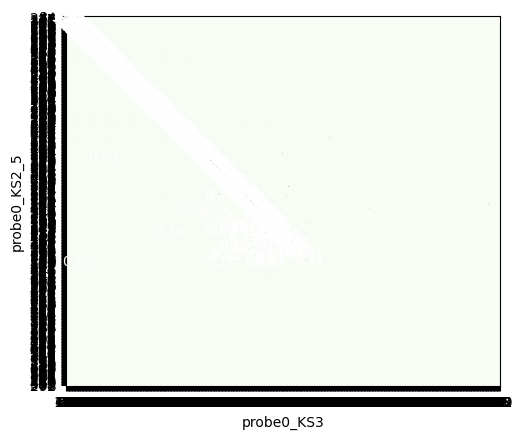

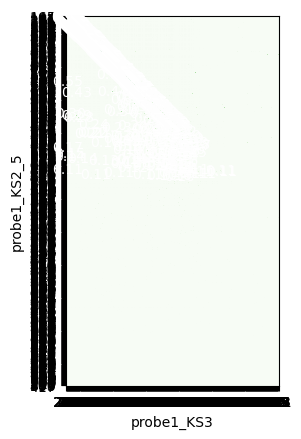

In [6]:

#now compare the sortings
probe0_compare_ks2_5_ks3 = spikeinterface.comparison.compare_two_sorters(sorting1=probe0_sorting_ks2_5, sorting2=probe0_sorting_ks3, sorting1_name='probe0_KS2_5',sorting2_name= 'probe0_KS3')
probe1_compare_ks2_5_ks3 = spikeinterface.comparison.compare_two_sorters(sorting1=probe1_sorting_ks2_5, sorting2=probe1_sorting_ks3,sorting1_name= 'probe1_KS2_5', sorting2_name='probe1_KS3')


#now plot the comparison
si.plot_agreement_matrix(probe0_compare_ks2_5_ks3)
plt.savefig(ephys_folder+'/probe0/sorters/compare_ks2_5_ks3.png')
si.plot_agreement_matrix(probe1_compare_ks2_5_ks3)
plt.savefig(ephys_folder+'/probe1/sorters/compare_ks2_5_ks3.png')


#print the agreement scores and match_event_counts
print(probe0_compare_ks2_5_ks3.match_event_count)
print(probe0_compare_ks2_5_ks3.agreement_scores)
print(probe1_compare_ks2_5_ks3.match_event_count)
print(probe1_compare_ks2_5_ks3.agreement_scores)

In [7]:
#extract waveforms from duplicate removed sortings
#extract waveforms from sorted data
probe0_we_ks2_5 = si.extract_waveforms(probe0_preprocessed_corrected, probe0_sorting_ks2_5, folder= ephys_folder +'/probe0/waveform/kilosort2_5',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

In [8]:


probe0_we_ks3 = si.extract_waveforms(probe0_preprocessed_corrected, probe0_sorting_ks3, folder=ephys_folder +'/probe0/waveform/kilosort3',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2., 
                          **job_kwargs)


probe1_we_ks2_5 = si.extract_waveforms(probe1_preprocessed_corrected, probe1_sorting_ks2_5, folder=ephys_folder +'/probe1/waveform/kilosort2_5',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


probe1_we_ks3 = si.extract_waveforms(probe1_preprocessed_corrected, probe1_sorting_ks3, folder=ephys_folder +'/probe1/waveform/kilosort3',
                          sparse=True, max_spikes_per_unit=500, ms_before=1.5,ms_after=2.,
                          **job_kwargs)


extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms shared_memory multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

extract waveforms memmap multi buffer:   0%|          | 0/5194 [00:00<?, ?it/s]

In [9]:
#grab extracted waveforms saved on the server

probe0_we_ks2_5 = si.load_waveforms(folder = ephys_folder + 'probe0/waveform/kilosort2_5/')
probe0_we_ks3 = si.load_waveforms(folder = ephys_folder + 'probe0/waveform/kilosort3/')
probe1_we_ks2_5 = si.load_waveforms(folder = ephys_folder + 'probe1/waveform/kilosort2_5/')
probe1_we_ks3 = si.load_waveforms(folder = ephys_folder + 'probe1/waveform/kilosort3/')

template_metric_probe0_ks2_5 = si.compute_template_metrics(probe0_we_ks2_5)
template_metric_probe0_ks3 = si.compute_template_metrics(probe0_we_ks3)
template_metric_probe1_ks2_5 = si.compute_template_metrics(probe1_we_ks2_5)
template_metric_probe1_ks3 = si.compute_template_metrics(probe1_we_ks3)

noise_levels_probe0_ks2_5 = si.compute_noise_levels(probe0_we_ks2_5)
noise_levels_probe0_ks3 = si.compute_noise_levels(probe0_we_ks3)
noise_levels_probe1_ks2_5 = si.compute_noise_levels(probe1_we_ks2_5)
noise_levels_probe1_ks3 = si.compute_noise_levels(probe1_we_ks3)

PCA_probe0_ks2_5 = si.compute_principal_components(probe0_we_ks2_5)
PCA_probe0_ks3 = si.compute_principal_components(probe0_we_ks3)
PCA_probe1_ks2_5 = si.compute_principal_components(probe1_we_ks2_5)
PCA_probe1_ks3 = si.compute_principal_components(probe1_we_ks3)

template_similarity_probe0_ks2_5 = si.compute_template_similarity(probe0_we_ks2_5)
template_similarity_probe0_ks3 = si.compute_template_similarity(probe0_we_ks3)
template_similarity_probe1_ks2_5 = si.compute_template_similarity(probe1_we_ks2_5)
template_similarity_probe1_ks3 = si.compute_template_similarity(probe1_we_ks3)

correlograms_probe0_ks2_5 = si.compute_correlograms(probe0_we_ks2_5)
correlograms_probe0_ks3 = si.compute_correlograms(probe0_we_ks3)
correlograms_probe1_ks2_5 = si.compute_correlograms(probe1_we_ks2_5)
correlograms_probe1_ks3 = si.compute_correlograms(probe1_we_ks3)

amplitudes_probe0_ks2_5 = si.compute_spike_amplitudes(probe0_we_ks2_5)
amplitudes_probe0_ks3 = si.compute_spike_amplitudes(probe0_we_ks3)
amplitudes_probe1_ks2_5 = si.compute_spike_amplitudes(probe1_we_ks2_5)
amplitudes_probe1_ks3 = si.compute_spike_amplitudes(probe1_we_ks3)

unit_locations_probe0_ks2_5 = si.compute_unit_locations(probe0_we_ks2_5)
unit_locations_probe0_ks3 = si.compute_unit_locations(probe0_we_ks3)
unit_locations_probe1_ks2_5 = si.compute_unit_locations(probe1_we_ks2_5)
unit_locations_probe1_ks3 = si.compute_unit_locations(probe1_we_ks3)

spike_locations_probe0_ks2_5 = si.compute_spike_locations(probe0_we_ks2_5)
spike_locations_probe0_ks3 = si.compute_spike_locations(probe0_we_ks3)
spike_locations_probe1_ks2_5 = si.compute_spike_locations(probe1_we_ks2_5)
spike_locations_probe1_ks3 = si.compute_spike_locations(probe1_we_ks3)


/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


Fitting PCA:   0%|          | 0/500 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/500 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/587 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/587 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/728 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/728 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/419 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/419 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/5194 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/5194 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/5194 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/5194 [00:00<?, ?it/s]

localize peaks using center_of_mass:   0%|          | 0/5194 [00:00<?, ?it/s]

localize peaks using center_of_mass:   0%|          | 0/5194 [00:00<?, ?it/s]

localize peaks using center_of_mass:   0%|          | 0/5194 [00:00<?, ?it/s]

localize peaks using center_of_mass:   0%|          | 0/5194 [00:00<?, ?it/s]

In [10]:

isi_histograms_probe0_ks2_5 = si.compute_isi_histograms(probe0_we_ks2_5)
isi_histograms_probe0_ks3 = si.compute_isi_histograms(probe0_we_ks3)
isi_histograms_probe1_ks2_5 = si.compute_isi_histograms(probe1_we_ks2_5)
isi_histograms_probe1_ks3 = si.compute_isi_histograms(probe1_we_ks3)

In [11]:
qm_list = si.get_quality_metric_list()
probe0_ks2_5_metrics = si.compute_quality_metrics(probe0_we_ks2_5, metric_names=qm_list)
probe0_ks3_metrics = si.compute_quality_metrics(probe0_we_ks3, metric_names=qm_list)
probe1_ks2_5_metrics = si.compute_quality_metrics(probe1_we_ks2_5, metric_names=qm_list)
probe1_ks3_metrics = si.compute_quality_metrics(probe1_we_ks3, metric_names=qm_list)

/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:842: UserWarning: Units [2, 6, 7, 13, 37, 42, 80, 101, 102, 117, 118, 119, 120, 122, 123, 141, 149, 202, 230, 236, 252, 298, 301, 302, 314, 322, 348, 368, 372, 373, 374, 375, 381, 384, 386, 387, 402, 415, 439, 445, 449, 462, 464, 465, 470, 471, 481, 482, 489, 492, 495, 496, 497, 500, 507, 508] have too few spikes and amplitude_cutoff is set to NaN
  warnings.warn(f"Units {nan_units} have too few spikes and " "amplitude_cutoff is set to NaN")
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/lab/anaconda3/envs/si_env/lib/python3.10/site-p